In [1]:
%matplotlib inline

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, average_precision_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier,
                              BaggingClassifier, VotingClassifier, GradientBoostingClassifier)

In [4]:
methods = {'Logistic regression': LogisticRegression(),
           'Naive Bayes': GaussianNB(),
           'K-NN': KNeighborsClassifier(), 
           'Decision Tree': DecisionTreeClassifier(), 
           'Random Forest': RandomForestClassifier(), 
           'Extra Trees': ExtraTreesClassifier(), 
           'Vote': VotingClassifier(estimators=[('lr', LogisticRegressionCV(cv=5, max_iter=1000)),
                                                  ('nb', GaussianNB()),
                                                  ('dt', DecisionTreeClassifier()),
                                                  ('et', ExtraTreesClassifier(n_estimators=100, bootstrap=True)),
                                                  ('rf', RandomForestClassifier(n_estimators=150))],
                                      voting='soft')}

In [5]:
def classifier(X, y, methods, test_size=0.25, save=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    file_res = ''
    
    for name, clf in methods.items():
    
        res = ''
        
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)

        res += '\t' + name + '\n'
        res += 'Confusion matrix:\n{}\n'.format(confusion_matrix(y_test, prediction))
        res += 'Accuracy: {}\n'.format(clf.score(X_test, y_test))
        res += 'AUC score: {}\n'.format(roc_auc_score(y_test, prediction))
        print(res)
        
        tpr, fpr, thrh = roc_curve(y_test, prediction)        
        plt.plot(tpr, fpr, label=name)
        plt.legend(loc='best')
        
        file_res += res
    
    if save:
        with open('{}.txt', 'w') as f:
            print(file_res, file=f)

In [6]:
def get_name(obj):
    return str(obj).split('.')[-1][:-2]

In [7]:
def boosted_classifier(X, y, boost_method, methods, test_size=0.25, save=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    file_res = ''
    
    for name, clf in methods.items():
    
        res = ''
        # because AdaBoostClassifier doesn't support K-NN
        boosted_clf = boost_method(clf)
        try:
            boosted_clf.fit(X_train, y_train)
        except ValueError:
            continue
        prediction = boosted_clf.predict(X_test)

        res += '\t{} + {}\n'.format(get_name(boost_method), name)
        res += 'Confusion matrix:\n{}\n'.format(confusion_matrix(y_test, prediction))
        res += 'Accuracy: {}\n'.format(boosted_clf.score(X_test, y_test))
        res += 'AUC score: {}\n'.format(roc_auc_score(y_test, prediction))
        print(res)
        
        tpr, fpr, thrh = roc_curve(y_test, prediction)        
        plt.plot(tpr, fpr, label=name)
        plt.legend(loc='best')
        
        file_res += res
    
    if save:
        with open('{}.txt', 'w') as f:
            print(file_res, file=f)

### Working with 10s time windows

In [8]:
data = pd.read_csv('../Parser/human-bot-10000-data.csv', index_col=[0])

In [9]:
len(data[data['label'] == 1]), len(data[data['label'] == 0])

(232, 225)

Very balanced data

In [10]:
X = data.drop('label', axis=1)
y = data['label']

In [11]:
X.describe()

,apm,epm,gpm,aht,dev,tln,dbc,tbc
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,0.008462,0.063670,0.005516,0.032175,0.105590,0.498994,0.127355,0.762182
std,0.004545,0.129039,0.011662,0.051082,0.114127,0.223614,0.077323,0.212169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005835,0.017260,0.001562,0.003756,0.062680,0.340220,0.083858,0.664893
50%,0.007930,0.038703,0.003401,0.031421,0.091171,0.521474,0.117482,0.810808
75%,0.010576,0.065507,0.006254,0.050750,0.117114,0.683270,0.157529,0.913200
max,0.033602,1.000000,0.122749,0.912385,0.916342,0.903073,0.706798,0.998487


	Logistic regression
Confusion matrix:
[[42 12]
 [10 51]]
Accuracy: 0.808695652173913
AUC score: 0.8069216757741348

	Naive Bayes
Confusion matrix:
[[34 20]
 [ 5 56]]
Accuracy: 0.782608695652174
AUC score: 0.7738312082574379

	K-NN
Confusion matrix:
[[47  7]
 [ 8 53]]
Accuracy: 0.8695652173913043
AUC score: 0.8696114146933819

	Decision Tree
Confusion matrix:
[[45  9]
 [ 6 55]]
Accuracy: 0.8695652173913043
AUC score: 0.8674863387978142

	Random Forest
Confusion matrix:
[[50  4]
 [ 7 54]]
Accuracy: 0.9043478260869565
AUC score: 0.9055859137826352

	Extra Trees
Confusion matrix:
[[50  4]
 [ 8 53]]
Accuracy: 0.8956521739130435
AUC score: 0.8973891924711596

	Vote
Confusion matrix:
[[44 10]
 [ 6 55]]
Accuracy: 0.8608695652173913
AUC score: 0.8582270795385549



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


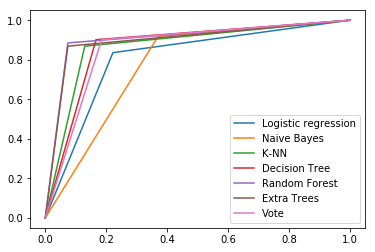

In [12]:
classifier(X, y, methods=methods)

### As we can see, the accuracy is not high enough. Lets try 20s time windows

In [13]:
data = pd.read_csv('../Parser/human-bot-20000-data.csv', index_col=[0])

In [14]:
len(data[data['label'] == 1]), len(data[data['label'] == 0])

(118, 114)

Still very balanced

In [15]:
X = data.drop('label', axis=1)
y = data['label']

In [16]:
X.describe()

,apm,epm,gpm,aht,dev,tln,dbc,tbc
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,0.004188,0.035081,0.003064,0.017564,0.071894,0.520314,0.072122,0.786141
std,0.001766,0.098405,0.008661,0.021960,0.099750,0.207819,0.064621,0.179417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003131,0.009891,0.000726,0.002095,0.047175,0.387391,0.046055,0.696145
50%,0.003993,0.020910,0.001801,0.017481,0.058276,0.547621,0.063225,0.816626
75%,0.005197,0.031221,0.002900,0.026567,0.069771,0.693689,0.081651,0.911841
max,0.013222,0.907804,0.092321,0.244653,0.816189,0.889198,0.698372,0.998279


	Logistic regression
Confusion matrix:
[[25  6]
 [ 3 24]]
Accuracy: 0.8448275862068966
AUC score: 0.8476702508960573

	Naive Bayes
Confusion matrix:
[[18 13]
 [ 1 26]]
Accuracy: 0.7586206896551724
AUC score: 0.7718040621266427

	K-NN
Confusion matrix:
[[25  6]
 [ 2 25]]
Accuracy: 0.8620689655172413
AUC score: 0.8661887694145758

	Decision Tree
Confusion matrix:
[[30  1]
 [ 3 24]]
Accuracy: 0.9310344827586207
AUC score: 0.9283154121863799

	Random Forest
Confusion matrix:
[[29  2]
 [ 1 26]]
Accuracy: 0.9482758620689655
AUC score: 0.9492234169653525

	Extra Trees
Confusion matrix:
[[27  4]
 [ 1 26]]
Accuracy: 0.9137931034482759
AUC score: 0.9169653524492233

	Vote
Confusion matrix:
[[28  3]
 [ 1 26]]
Accuracy: 0.9310344827586207
AUC score: 0.9330943847072878



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


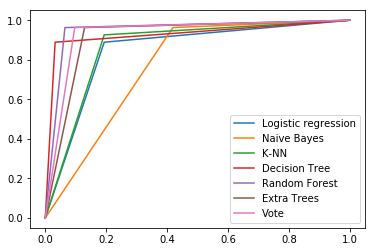

In [17]:
classifier(X, y, methods=methods)

#### Accuracy raised pretty good

## Boosting

We will work with 20s time windows as they have shown better accuracy

In [18]:
data = pd.read_csv('../Parser/human-bot-20000-data.csv', index_col=[0])

In [19]:
X = data.drop('label', axis=1)
y = data['label']

### Bagging

	BaggingClassifier + Logistic regression
Confusion matrix:
[[20  5]
 [ 5 28]]
Accuracy: 0.8275862068965517
AUC score: 0.8242424242424243

	BaggingClassifier + Naive Bayes
Confusion matrix:
[[17  8]
 [ 1 32]]
Accuracy: 0.8448275862068966
AUC score: 0.8248484848484848

	BaggingClassifier + K-NN
Confusion matrix:
[[21  4]
 [ 3 30]]
Accuracy: 0.8793103448275862
AUC score: 0.8745454545454546

	BaggingClassifier + Decision Tree
Confusion matrix:
[[23  2]
 [ 3 30]]
Accuracy: 0.9137931034482759
AUC score: 0.9145454545454547

	BaggingClassifier + Random Forest
Confusion matrix:
[[24  1]
 [ 2 31]]
Accuracy: 0.9482758620689655
AUC score: 0.9496969696969697

	BaggingClassifier + Extra Trees
Confusion matrix:
[[24  1]
 [ 3 30]]
Accuracy: 0.9310344827586207
AUC score: 0.9345454545454546

	BaggingClassifier + Vote
Confusion matrix:
[[24  1]
 [ 1 32]]
Accuracy: 0.9655172413793104
AUC score: 0.9648484848484848



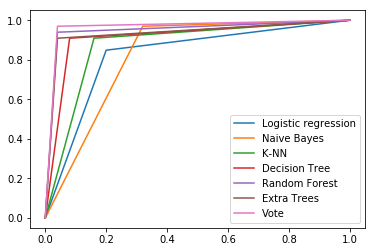

In [20]:
boosted_classifier(X, y, BaggingClassifier, methods)

### Ada boost

	AdaBoostClassifier + Logistic regression
Confusion matrix:
[[20  3]
 [ 5 30]]
Accuracy: 0.8620689655172413
AUC score: 0.8633540372670807

	AdaBoostClassifier + Naive Bayes
Confusion matrix:
[[14  9]
 [ 0 35]]
Accuracy: 0.8448275862068966
AUC score: 0.8043478260869565

	AdaBoostClassifier + Decision Tree
Confusion matrix:
[[21  2]
 [ 2 33]]
Accuracy: 0.9310344827586207
AUC score: 0.9279503105590063

	AdaBoostClassifier + Random Forest
Confusion matrix:
[[21  2]
 [ 4 31]]
Accuracy: 0.896551724137931
AUC score: 0.8993788819875776

	AdaBoostClassifier + Extra Trees
Confusion matrix:
[[21  2]
 [ 4 31]]
Accuracy: 0.896551724137931
AUC score: 0.8993788819875776

	AdaBoostClassifier + Vote
Confusion matrix:
[[20  3]
 [ 2 33]]
Accuracy: 0.9137931034482759
AUC score: 0.9062111801242235



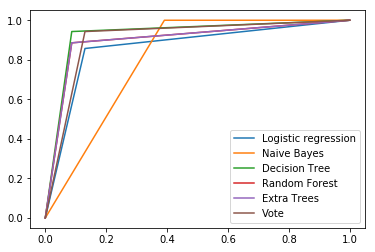

In [23]:
boosted_classifier(X, y, AdaBoostClassifier, methods)

### Gradient Boosting

	GradientBoosting
Confusion matrix:
[[26  3]
 [ 2 27]]
Accuracy: 0.9137931034482759
AUC score: 0.9137931034482758



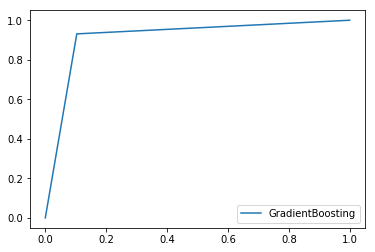

In [24]:
classifier(X, y, {'GradientBoosting': GradientBoostingClassifier()})

### Small research / feature selection

In [25]:
data = pd.read_csv('../Parser/human-bot-20000-data.csv', index_col=[0])

In [26]:
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 231
Data columns (total 8 columns):
apm    232 non-null float64
epm    232 non-null float64
gpm    232 non-null float64
aht    232 non-null float64
dev    232 non-null float64
tln    232 non-null float64
dbc    232 non-null float64
tbc    232 non-null float64
dtypes: float64(8)
memory usage: 16.3 KB


In [28]:
import eli5
from eli5.sklearn import PermutationImportance

eli5 provides a way to compute feature importances for any black-box estimator by measuring how score decreases when a feature is not available; the method is also known as “permutation importance” or “Mean Decrease Accuracy (MDA)”.

In [34]:
RF_clf = RandomForestClassifier().fit(X_train, y_train)
DT_clf = DecisionTreeClassifier().fit(X_train, y_train)
V_clf = VotingClassifier(estimators=[('lr', LogisticRegressionCV(cv=5, max_iter=1000)),
                                                  ('nb', GaussianNB()),
                                                  ('dt', DecisionTreeClassifier()),
                                                  ('et', ExtraTreesClassifier(n_estimators=100, bootstrap=True)),
                                                  ('rf', RandomForestClassifier(n_estimators=150))],
                                      voting='soft')

#### As RandomForest and DecisionTree showed best accuracy before, we'll use them to estimate feature importances

In [67]:
perm_rf = PermutationImportance(RF_clf).fit(X_test, y_test)
perm_dt = PermutationImportance(DT_clf).fit(X_test, y_test)
eli5.show_weights(perm_rf)

Weight,Feature
0.0793 ± 0.0833,x2
0.0483 ± 0.0338,x3
0.0414 ± 0.0468,x5
0.0069 ± 0.0276,x7
0.0069 ± 0.0276,x4
0.0069 ± 0.0352,x1
0.0069 ± 0.0169,x0
-0.0034 ± 0.0138,x6


In [68]:
eli5.show_weights(perm_dt)

Weight,Feature
0.1483 ± 0.0352,x2
0.1414 ± 0.1121,x7
0.0069 ± 0.0276,x0
0 ± 0.0000,x6
0 ± 0.0000,x5
0 ± 0.0000,x4
-0.0000 ± 0.0218,x1
-0.0310 ± 0.0457,x3


#### Making a conclusion, that we should use features ['gpm', 'tbc', 'epm', 'aht'] ('dev'?)

In [69]:
X_red = X[['gpm', 'tbc', 'epm', 'aht']]

	Logistic regression
Confusion matrix:
[[17 14]
 [ 0 27]]
Accuracy: 0.7586206896551724
AUC score: 0.7741935483870968

	Naive Bayes
Confusion matrix:
[[22  9]
 [ 0 27]]
Accuracy: 0.8448275862068966
AUC score: 0.8548387096774194

	K-NN
Confusion matrix:
[[26  5]
 [ 3 24]]
Accuracy: 0.8620689655172413
AUC score: 0.8637992831541219

	Decision Tree
Confusion matrix:
[[27  4]
 [ 0 27]]
Accuracy: 0.9310344827586207
AUC score: 0.935483870967742

	Random Forest
Confusion matrix:
[[29  2]
 [ 0 27]]
Accuracy: 0.9655172413793104
AUC score: 0.967741935483871

	Extra Trees
Confusion matrix:
[[28  3]
 [ 1 26]]
Accuracy: 0.9310344827586207
AUC score: 0.9330943847072878

	Vote
Confusion matrix:
[[28  3]
 [ 0 27]]
Accuracy: 0.9482758620689655
AUC score: 0.9516129032258064



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


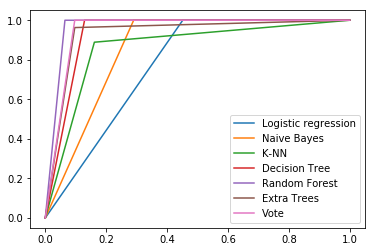

In [70]:
classifier(X_red, y, methods)

	BaggingClassifier + Logistic regression
Confusion matrix:
[[22  9]
 [ 0 27]]
Accuracy: 0.8448275862068966
AUC score: 0.8548387096774194

	BaggingClassifier + Naive Bayes
Confusion matrix:
[[24  7]
 [ 0 27]]
Accuracy: 0.8793103448275862
AUC score: 0.8870967741935484

	BaggingClassifier + K-NN
Confusion matrix:
[[29  2]
 [ 2 25]]
Accuracy: 0.9310344827586207
AUC score: 0.930704898446834

	BaggingClassifier + Decision Tree
Confusion matrix:
[[27  4]
 [ 2 25]]
Accuracy: 0.896551724137931
AUC score: 0.8984468339307049

	BaggingClassifier + Random Forest
Confusion matrix:
[[26  5]
 [ 1 26]]
Accuracy: 0.896551724137931
AUC score: 0.9008363201911589

	BaggingClassifier + Extra Trees
Confusion matrix:
[[27  4]
 [ 1 26]]
Accuracy: 0.9137931034482759
AUC score: 0.9169653524492233

	BaggingClassifier + Vote
Confusion matrix:
[[27  4]
 [ 1 26]]
Accuracy: 0.9137931034482759
AUC score: 0.9169653524492233



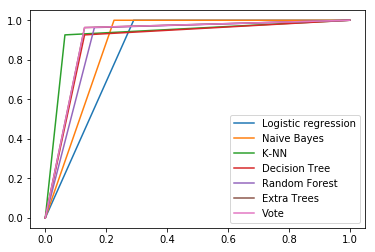

In [72]:
boosted_classifier(X_red, y, BaggingClassifier, methods)

	AdaBoostClassifier + Logistic regression
Confusion matrix:
[[14 18]
 [ 1 25]]
Accuracy: 0.6724137931034483
AUC score: 0.6995192307692308

	AdaBoostClassifier + Naive Bayes
Confusion matrix:
[[30  2]
 [ 4 22]]
Accuracy: 0.896551724137931
AUC score: 0.8918269230769231

	AdaBoostClassifier + Decision Tree
Confusion matrix:
[[29  3]
 [ 5 21]]
Accuracy: 0.8620689655172413
AUC score: 0.856971153846154

	AdaBoostClassifier + Random Forest
Confusion matrix:
[[30  2]
 [ 2 24]]
Accuracy: 0.9310344827586207
AUC score: 0.9302884615384616

	AdaBoostClassifier + Extra Trees
Confusion matrix:
[[31  1]
 [ 5 21]]
Accuracy: 0.896551724137931
AUC score: 0.8882211538461539

	AdaBoostClassifier + Vote
Confusion matrix:
[[28  4]
 [ 3 23]]
Accuracy: 0.8793103448275862
AUC score: 0.8798076923076923



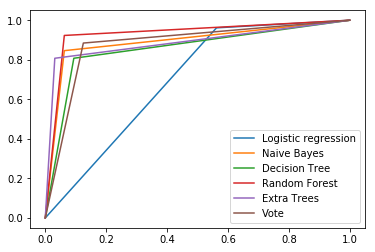

In [73]:
boosted_classifier(X_red, y, AdaBoostClassifier, methods)

	GradientBoosting
Confusion matrix:
[[26  5]
 [ 2 25]]
Accuracy: 0.8793103448275862
AUC score: 0.8823178016726405



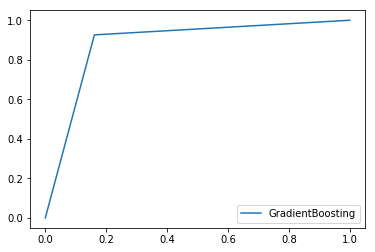

In [75]:
classifier(X_red, y, {'GradientBoosting': GradientBoostingClassifier()})

### Let's try add 'dev'

In [110]:
X_red_wdev = X[['tbc', 'aht', 'tln']]

	Logistic regression
Confusion matrix:
[[22  4]
 [ 4 28]]
Accuracy: 0.8620689655172413
AUC score: 0.860576923076923

	Naive Bayes
Confusion matrix:
[[21  5]
 [ 4 28]]
Accuracy: 0.8448275862068966
AUC score: 0.8413461538461539

	K-NN
Confusion matrix:
[[24  2]
 [ 4 28]]
Accuracy: 0.896551724137931
AUC score: 0.8990384615384616

	Decision Tree
Confusion matrix:
[[22  4]
 [ 3 29]]
Accuracy: 0.8793103448275862
AUC score: 0.876201923076923

	Random Forest
Confusion matrix:
[[21  5]
 [ 4 28]]
Accuracy: 0.8448275862068966
AUC score: 0.8413461538461539

	Extra Trees
Confusion matrix:
[[22  4]
 [ 4 28]]
Accuracy: 0.8620689655172413
AUC score: 0.860576923076923



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


	Vote
Confusion matrix:
[[23  3]
 [ 2 30]]
Accuracy: 0.9137931034482759
AUC score: 0.9110576923076923



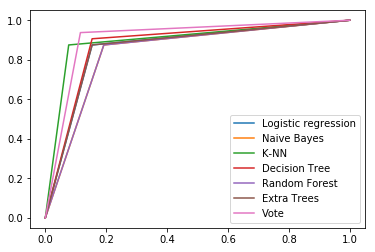

In [111]:
classifier(X_red_wdev, y, methods)

	BaggingClassifier + Logistic regression
Confusion matrix:
[[20  7]
 [ 1 30]]
Accuracy: 0.8620689655172413
AUC score: 0.8542413381123057

	BaggingClassifier + Naive Bayes
Confusion matrix:
[[14 13]
 [ 0 31]]
Accuracy: 0.7758620689655172
AUC score: 0.7592592592592593

	BaggingClassifier + K-NN
Confusion matrix:
[[23  4]
 [ 3 28]]
Accuracy: 0.8793103448275862
AUC score: 0.8775388291517324

	BaggingClassifier + Decision Tree
Confusion matrix:
[[23  4]
 [ 1 30]]
Accuracy: 0.9137931034482759
AUC score: 0.9097968936678614

	BaggingClassifier + Random Forest
Confusion matrix:
[[23  4]
 [ 1 30]]
Accuracy: 0.9137931034482759
AUC score: 0.9097968936678614

	BaggingClassifier + Extra Trees
Confusion matrix:
[[23  4]
 [ 1 30]]
Accuracy: 0.9137931034482759
AUC score: 0.9097968936678614

	BaggingClassifier + Vote
Confusion matrix:
[[22  5]
 [ 1 30]]
Accuracy: 0.896551724137931
AUC score: 0.8912783751493429



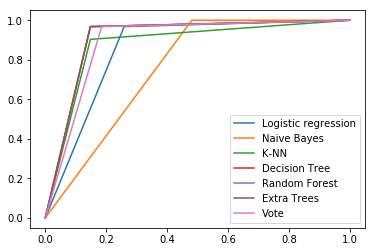

In [112]:
boosted_classifier(X_red, y, BaggingClassifier, methods)

	AdaBoostClassifier + Logistic regression
Confusion matrix:
[[ 8 27]
 [ 1 22]]
Accuracy: 0.5172413793103449
AUC score: 0.5925465838509316

	AdaBoostClassifier + Naive Bayes
Confusion matrix:
[[25 10]
 [ 1 22]]
Accuracy: 0.8103448275862069
AUC score: 0.8354037267080746

	AdaBoostClassifier + Decision Tree
Confusion matrix:
[[33  2]
 [ 2 21]]
Accuracy: 0.9310344827586207
AUC score: 0.9279503105590062

	AdaBoostClassifier + Random Forest
Confusion matrix:
[[34  1]
 [ 4 19]]
Accuracy: 0.9137931034482759
AUC score: 0.8987577639751554

	AdaBoostClassifier + Extra Trees
Confusion matrix:
[[35  0]
 [ 1 22]]
Accuracy: 0.9827586206896551
AUC score: 0.9782608695652174

	AdaBoostClassifier + Vote
Confusion matrix:
[[34  1]
 [ 2 21]]
Accuracy: 0.9482758620689655
AUC score: 0.9422360248447206



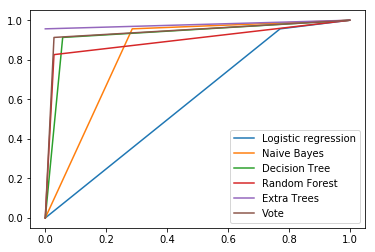

In [113]:
boosted_classifier(X_red, y, AdaBoostClassifier, methods)

### We can see, that on the smallest feature set `Random Forest` obviously showes best accuracy, because that features was picked up considering this classificator.

### Classification results showed up, that adding 'dev' feature decreases accuracy in all cases, except human vs human classification (which, probably, happened because of different play styles of concrete players). In other cases, made a conclusion, that using 'dev' feature makes our data more noisy, that's why we won't use it 